In [7]:
import torch 
import torchvision 
from torch.utils.data import DataLoader
import numpy as np 
from torch import nn
from torchvision import transforms,datasets

In [19]:

epochs =10 
batch_size =64
Use_Cuda = torch.cuda.is_available()
Device = torch.device("cuda" if Use_Cuda else "cpu")
print("using device ",Device)

## we will use only training dataset of fashion mnist 

train_set = datasets.MNIST(root ='/home/iamismail/Rebirth Pytorch',train=True,download=True,transform=transforms.ToTensor())
train_louder = DataLoader(dataset=train_set,batch_size=batch_size,shuffle=True)


using device  cpu


In [50]:
data_iter = iter(train_louder)
images , labels = data_iter.next()
print(torch.max(images),torch.min(images))

tensor(1.) tensor(0.)


In [51]:
# repeatedly reduce the size
class Autoencoder_Linear(nn.Module):
    def __init__(self):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3) # -> N, 3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
# Input [-1, +1] -> use nn.Tanh

In [37]:
### Auto-encoder class 
class NN_Autoencoder(nn.Module):
    def __init__(self):
         super().__init__()
         self.encoder =nn.Sequential(
             nn.Linear(28*28,128), ## N,784 -> N, 128
             nn.ReLU(),
             nn.Linear(128,64),    ### N,128 -> N,64
             nn.ReLU(),
             nn.Linear(64,12),  #N,64 -> N,12
             nn.ReLU() ,
             nn.Linear(12,3)  # N,12 -> N,3
         )
         self.decoder = nn.Sequential(
            ## N,3 -> N,785
            nn.Linear(3,12),
            nn.ReLU(),
            nn.Linear(12,64),
            nn.ReLU(),
            nn.Linear(64,128),
            nn.ReLU(),
            nn.Linear(128,28*28),  ## N,3 -> N,784
            nn.Sigmoid()
             
         )
    def forward(self,x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)

        return encoded,decoded

In [52]:
model = Autoencoder_Linear()
criterion =nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [ ]:
##training loop 
num_epochs = 20 
outputs =[]

for epcoch in range(num_epochs):
    for (image,_) in train_louder:
        image = image.reshape(-1, 28*28)
        recon =model(image)
        loss = criterion(recon,image)

        optimizer.zero_grad()
       ## loss.backward()
        optimizer.step()
    print(f'Epoch:{epcoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epcoch, image, recon))

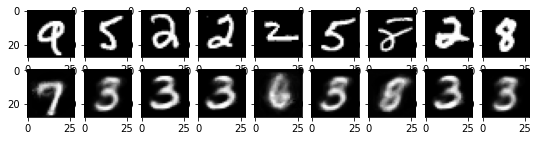

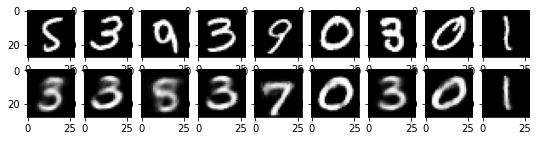

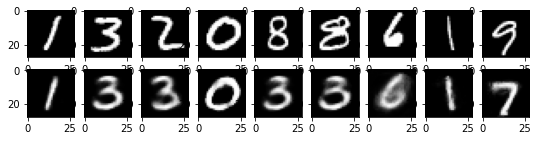

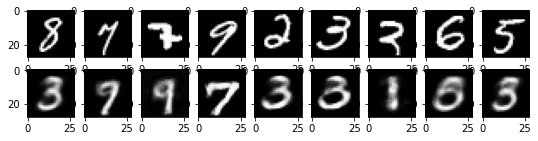

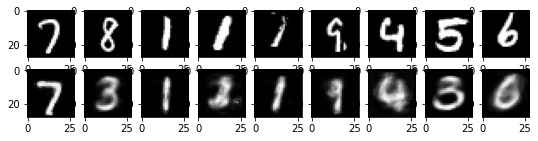

In [57]:
import matplotlib.pyplot as plt
for k in range(0, num_epochs, 4):
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = outputs[k][1].detach().numpy()
    recon = outputs[k][2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
      
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])